<a href="https://colab.research.google.com/github/jeandirel/NLP/blob/main/Rock_Paper_Scissors_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import

In [6]:
# prompt: import tensorflow, tensorflow dataset, matplotlib, numpy, platform, datetime, os, math,

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import platform
import datetime
import os
import math
import random

In [3]:
# prompt: tfds.list

(tfds.list_builders())


['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'ai2dcaption',
 'aloha_mobile',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asimov_dilemmas_auto_val',
 'asimov_dilemmas_scifi_train',
 'asimov_dilemmas_scifi_val',
 'asimov_injury_val',
 'asimov_multimodal_auto_val',
 'asimov_multimodal_manual_val',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 '

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.LSSVLF_3.0.0/rock_paper_scissors-train.tfre…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.LSSVLF_3.0.0/rock_paper_scissors-test.tfrec…

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_dir='/root/tensorflow_datasets/rock_paper_scissors/3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author 

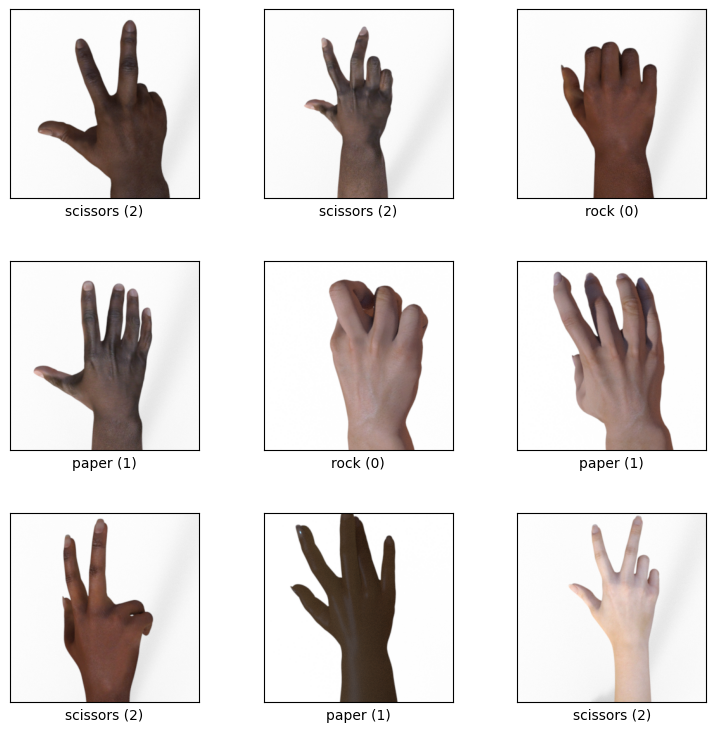

Image Shape: (300, 300, 3), Label: 2


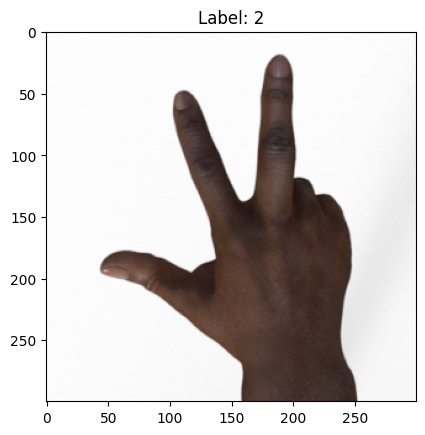

In [4]:
# prompt: datasetname = rockpaper

dataset_name = "rock_paper_scissors"

dataset, info = tfds.load(name=dataset_name, split='train', with_info=True)
print(info)
# The dataset is loaded as a tf.data.Dataset object.
# This means we can iterate over the dataset using the following code:
for example in dataset.take(10):
  print(example)
# You can then use matplotlib or any other library to display the images and labels.


# Example to show a few images with labels
fig = tfds.show_examples(dataset, info)

# Example to access the image and label for a single element
for example in dataset.take(1):
  image = example['image']
  label = example['label']
  print(f"Image Shape: {image.shape}, Label: {label.numpy()}")

  # Convert the image to a NumPy array
  image_np = image.numpy()

  # Convert the image from tf.Tensor to a NumPy array and display it
  plt.imshow(image_np)
  plt.title(f"Label: {label.numpy()}")
  plt.show()


In [5]:
# prompt: prrint rawtrain dataset, raw train dataset size, raw test train, raw test size

import tensorflow_datasets as tfds

dataset_name = "rock_paper_scissors"

# Load the training data
raw_train_data, info = tfds.load(name=dataset_name, split='train', with_info=True)

# Print the raw training data (first 5 elements for demonstration)
print("Raw Train Dataset (first 5 elements):")
for example in raw_train_data.take(5):
  print(example)

# Print the size of the raw training data
raw_train_size = info.splits['train'].num_examples
print(f"\nRaw Train Dataset Size: {raw_train_size}")


# Load the test data
raw_test_data = tfds.load(name=dataset_name, split='test')


# Print the raw test data (first 5 elements for demonstration)
print("\nRaw Test Dataset (first 5 elements):")
for example in raw_test_data.take(5):
  print(example)


# Get the size of the raw test data
raw_test_size = info.splits['test'].num_examples
print(f"\nRaw Test Dataset Size: {raw_test_size}")


Raw Train Dataset (first 5 elements):
{'image': <tf.Tensor: shape=(300, 300, 3), dtype=uint8, numpy=
array([[[254, 254, 254],
        [253, 253, 253],
        [254, 254, 254],
        ...,
        [251, 251, 251],
        [250, 250, 250],
        [250, 250, 250]],

       [[254, 254, 254],
        [254, 254, 254],
        [253, 253, 253],
        ...,
        [250, 250, 250],
        [251, 251, 251],
        [249, 249, 249]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [251, 251, 251],
        [250, 250, 250],
        [252, 252, 252]],

       ...,

       [[252, 252, 252],
        [251, 251, 251],
        [252, 252, 252],
        ...,
        [247, 247, 247],
        [249, 249, 249],
        [248, 248, 248]],

       [[253, 253, 253],
        [253, 253, 253],
        [251, 251, 251],
        ...,
        [248, 248, 248],
        [248, 248, 248],
        [248, 248, 248]],

       [[252, 252, 252],
        [253, 253, 253],
        [25

In [7]:
# prompt: dataset infos

import tensorflow_datasets as tfds

dataset_name = "rock_paper_scissors"

# Load the dataset with info
dataset, info = tfds.load(name=dataset_name, split='train', with_info=True)

# Print dataset information
info


tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_dir='/root/tensorflow_datasets/rock_paper_scissors/3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock

In [10]:
# prompt: split datasetinfo train, test
# print sample train
# print xample test
# print number of label classe

import tensorflow as tf
import tensorflow_datasets as tfds

dataset_name = "rock_paper_scissors"

# Load the dataset with info
dataset, info = tfds.load(name=dataset_name, split='train', with_info=True)

# Split the dataset into training and testing sets
train_data = dataset.take(int(0.8 * info.splits['train'].num_examples))
test_data = dataset.skip(int(0.8 * info.splits['train'].num_examples))


# Print sample training data
print("Sample Training Data:")
for example in train_data.take(2):
    print(example)

# Print sample testing data
print("\nSample Testing Data:")
for example in test_data.take(2):
    print(example)


# Print the number of label classes
print(f"\nNumber of label classes: {info.features['label'].num_classes}")


Sample Training Data:
{'image': <tf.Tensor: shape=(300, 300, 3), dtype=uint8, numpy=
array([[[254, 254, 254],
        [253, 253, 253],
        [254, 254, 254],
        ...,
        [251, 251, 251],
        [250, 250, 250],
        [250, 250, 250]],

       [[254, 254, 254],
        [254, 254, 254],
        [253, 253, 253],
        ...,
        [250, 250, 250],
        [251, 251, 251],
        [249, 249, 249]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [251, 251, 251],
        [250, 250, 250],
        [252, 252, 252]],

       ...,

       [[252, 252, 252],
        [251, 251, 251],
        [252, 252, 252],
        ...,
        [247, 247, 247],
        [249, 249, 249],
        [248, 248, 248]],

       [[253, 253, 253],
        [253, 253, 253],
        [251, 251, 251],
        ...,
        [248, 248, 248],
        [248, 248, 248],
        [248, 248, 248]],

       [[252, 252, 252],
        [253, 253, 253],
        [252, 252, 252],
  

In [13]:
# prompt: # prompt: switch between bigger and smaller image sisez that we will train our model
# IMG_SIZE = 300  # Original image size
# IMG_SIZE_RESIZED = 150 # Smaller image size
# # Function to resize images
# def resize_image(image, label):
#   image = tf.image.resize(image, (IMG_SIZE_RESIZED, IMG_SIZE_RESIZED))
#   return image, label
# # Apply resizing based on a flag
# use_resized_images = True  # Set to True for smaller images, False for original size
# if use_resized_images:
#   train_data = train_data.map(resize_image)
#   test_data = test_data.map(resize_image)
#   print("Using resized images.")
# else:
#   print("Using original images.")
# # Now train_data and test_data contain images of the selected size.
# # Proceed with your model training.  Example of taking the first image:
# for example in train_data.take(1):
#   image = example[0]
#   label = example[1]
#   print(f"Image shape after resizing: {image.shape}")

IMG_SIZE = 300  # Original image size
IMG_SIZE_RESIZED = 150 # Smaller image size

# Function to resize images
def resize_image(image, label):
  image = tf.image.resize(image, (IMG_SIZE_RESIZED, IMG_SIZE_RESIZED))
  return image, label

# Prepare the datasets (assuming train_data and test_data are defined as in your previous code)
def prepare_dataset(dataset):
    # Convert the image data type to float32
    dataset = dataset.map(lambda x: (tf.image.convert_image_dtype(x['image'], dtype=tf.float32), x['label']))
    return dataset


train_data = prepare_dataset(train_data)
test_data = prepare_dataset(test_data)

# Apply resizing based on a flag
use_resized_images = True  # Set to True for smaller images, False for original size
if use_resized_images:
  train_data = train_data.map(resize_image)
  test_data = test_data.map(resize_image)
  print("Using resized images.")
else:
  print("Using original images.")

# Now train_data and test_data contain images of the selected size.
# Proceed with your model training.  Example of taking the first image:
for example in train_data.take(1):
  image = example[0]
  label = example[1]
  print(f"Image shape after resizing: {image.shape}")


Using resized images.
Image shape after resizing: (150, 150, 3)


In [14]:
# prompt: function to conver labe ID to Label string

def id_to_label(label_id):
  """Converts a label ID to its corresponding string label.

  Args:
    label_id: An integer representing the label ID.

  Returns:
    A string representing the label, or None if the ID is invalid.
  """
  if label_id == 0:
    return "rock"
  elif label_id == 1:
    return "paper"
  elif label_id == 2:
    return "scissors"
  else:
    return None


**L'objectif du projet est de construire un modèle de classification d'images capable de reconnaître des images représentant les gestes "rock" (pierre), "paper" (papier) et "scissors" (ciseaux) à partir du dataset "Rock-Paper-Scissors" disponible dans TensorFlow Datasets (TFDS). Les étapes clés incluent :

1. Charger le dataset depuis TFDS.
2. Afficher et comprendre le contenu du dataset (images et labels).
3. Afficher quelques exemples d'images pour mieux visualiser les données.
4. Analyser la taille des jeux d'entraînement et de test.
5. Préparer les données (redimensionnement, normalisation, augmentation).
6. Créer une fonction utilitaire pour convertir les ID de labels en noms lisibles.
7. Construire et entraîner un modèle de réseau de neurones convolutionnel (CNN) avec TensorFlow et Keras.
8. Évaluer le modèle sur le dataset de test.
9. Sauvegarder le modèle entraîné.
10. Effectuer des prédictions sur des images locales.
11. Visualiser les courbes d'apprentissage pour évaluer les performances du modèle.

En résumé, le projet vise à développer un modèle de classification d'images performant pour reconnaître les gestes "rock", "paper" et "scissors", en suivant un pipeline complet de traitement et d'entraînement de données.**

Datasets disponibles dans TFDS :
['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'ai2dcaption', 'aloha_mobile', 'amazon_us_reviews', 'anli', 'answer_equivalence', 'arc', 'asimov_dilemmas_auto_val', 'asimov_dilemmas_scifi_train', 'asimov_dilemmas_scifi_val', 'asimov_injury_val', 'asimov_multimodal_auto_val', 'asimov_multimodal_manual_val', 'asqa', 'asset', 'assin2', 'asu_table_top_converted_externally_to_rlds', 'austin_buds_dataset_converted_externally_to_rlds', 'austin_sailor_dataset_converted_externally_to_rlds', 'austin_sirius_dataset_converted_externally_to_rlds', 'bair_robot_pushing_small', 'bc_z', 'bccd', 'beans', 'bee_dataset', 'beir', 'berkeley_autolab_ur5', 'berkeley_cable_routing', 'berkeley_fanuc_manipulation', 'berkeley_gnm_cory_hall', 'berkeley_gnm_recon', 'berkeley_gnm_sac_son', 'berkeley_mvp_converted_externally_to_rlds', 'berkeley_rpt_converted_externally_to_rlds', 'big_patent', 'bigearthnet', 'billsum', 'binarized_

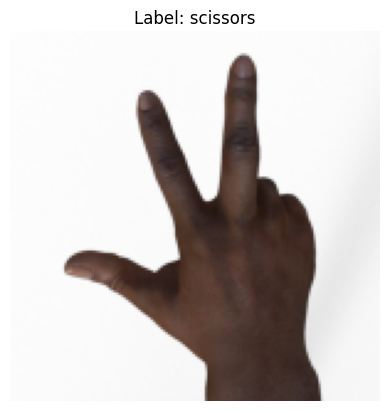


🎨 Affichage de quelques images d'entraînement :


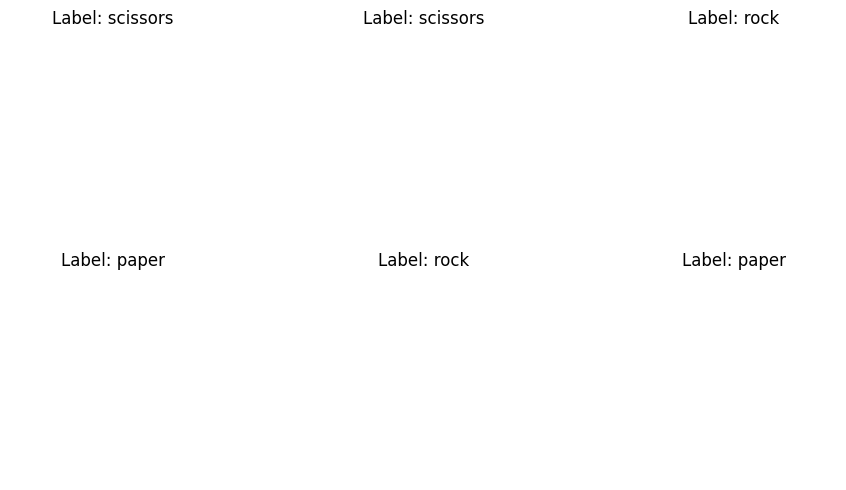

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.4855 - loss: 1.5575 - val_accuracy: 0.7231 - val_loss: 0.6375
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.9436 - loss: 0.1770 - val_accuracy: 0.7554 - val_loss: 0.7656
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.9709 - loss: 0.0924 - val_accuracy: 0.6667 - val_loss: 1.1446
Epoch 4/10
75/79 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9905 - loss: 0.0342

In [ ]:
# 📦 Import des librairies
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import platform
import datetime
import os
import math
import random

# 🔍 Affichage des datasets disponibles
print("Datasets disponibles dans TFDS :")
print(tfds.list_builders())

# 📥 Chargement du dataset Rock-Paper-Scissors
dataset_name = "rock_paper_scissors"
(raw_train_data, raw_test_data), info = tfds.load(
    name=dataset_name,
    split=['train', 'test'],
    with_info=True,
    as_supervised=True  # Pour avoir directement (image, label)
)

# ℹ️ Affichage des informations sur le dataset
print("\n=== Infos Dataset ===")
print(info)

# 🖼️ Affichage de quelques exemples d'images du training set
def show_sample_images(dataset, num_samples=6):
    plt.figure(figsize=(10, 5))
    for i, (image, label) in enumerate(dataset.take(num_samples)):
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(image.numpy())
        plt.title(f"Label: {id_to_label(label.numpy())}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# 🧾 Affichage brut des premiers éléments du train/test
print("\n=== Raw Train Dataset (first 5 elements) ===")
for example in raw_train_data.take(5):
    print(example)

print("\n=== Raw Test Dataset (first 5 elements) ===")
for example in raw_test_data.take(5):
    print(example)

# 📊 Taille des datasets
raw_train_size = info.splits['train'].num_examples
raw_test_size = info.splits['test'].num_examples
print(f"\nTaille du dataset d'entraînement : {raw_train_size}")
print(f"Taille du dataset de test : {raw_test_size}")

# 🔁 Conversion d'ID en nom de classe
def id_to_label(label_id):
    """Convertit un ID de label en nom lisible"""
    if label_id == 0:
        return "rock"
    elif label_id == 1:
        return "paper"
    elif label_id == 2:
        return "scissors"
    else:
        return "unknown"

# 🔧 Pré-traitement : Resize dynamique
IMG_SIZE = 300  # Original
IMG_SIZE_RESIZED = 150  # Resize target

def resize_image(image, label):
    """Resize une image à IMG_SIZE_RESIZED x IMG_SIZE_RESIZED"""
    image = tf.image.resize(image, (IMG_SIZE_RESIZED, IMG_SIZE_RESIZED))
    return image, label

# 🔁 Choix d’utiliser resize ou pas
use_resized_images = True

if use_resized_images:
    train_data = raw_train_data.map(resize_image)
    test_data = raw_test_data.map(resize_image)
    print("\n✅ Images redimensionnées à", IMG_SIZE_RESIZED)
else:
    train_data = raw_train_data
    test_data = raw_test_data
    print("\n✅ Images en taille originale")

# ✅ Affichage de la forme d’une image après resize
for image, label in train_data.take(1):
    print(f"Image shape after resizing: {image.shape}, Label: {id_to_label(label.numpy())}")
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(f"Label: {id_to_label(label.numpy())}")
    plt.axis("off")
    plt.show()

# 🖼️ Affichage de plusieurs images du training set
print("\n🎨 Affichage de quelques images d'entraînement :")
show_sample_images(train_data)

# 🌟 Normalisation des pixels
def normalize(image, label):
    """Normaliser les pixels de l'image entre 0 et 1"""
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_data = train_data.map(normalize)
test_data = test_data.map(normalize)

# 🔄 Augmentation des données
def augment(image, label):
    """Appliquer des transformations aléatoires pour augmenter le dataset"""
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    return image, label

train_data = train_data.map(augment)

# 🚀 Création d’un modèle CNN avec tf.keras.Sequential
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE_RESIZED, IMG_SIZE_RESIZED, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# 🔧 Compilation du modèle
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 🔄 Préparation des datasets pour l'entraînement
BATCH_SIZE = 32
train_data = train_data.shuffle(raw_train_size).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_data = test_data.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

# 🎓 Entraînement du modèle
EPOCHS = 10  # Ajuster le nombre d'époques selon les besoins
history = model.fit(train_data, epochs=EPOCHS, validation_data=test_data)

# 📈 Évaluation du modèle sur le dataset de test
test_loss, test_accuracy = model.evaluate(test_data)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

# 🚀 Sauvegarde du modèle
model.save("rock_paper_scissors_model.h5")
print("\n💾 Modèle sauvegardé sous 'rock_paper_scissors_model.h5'")

# 📷 Prédiction sur des images locales
def predict_on_local_image(image_path):
    """Prédire la classe d'une image locale"""
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMG_SIZE_RESIZED, IMG_SIZE_RESIZED))
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = np.expand_dims(image, axis=0) / 255.0
    prediction = model.predict(image)
    predicted_label = np.argmax(prediction)
    return id_to_label(predicted_label)

# Exemple de prédiction sur une image locale
local_image_path = "path/to/local/image.jpg"  # Remplacer par le chemin de votre image
predicted_label = predict_on_local_image(local_image_path)
print(f"\n🔍 Prédiction pour l'image locale : {predicted_label}")

# 🎨 Affichage de la courbe d'apprentissage
def plot_learning_curves(history):
    """Afficher les courbes d'apprentissage (précision et perte)"""
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(EPOCHS)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

# 🚀 Affichage des courbes d'apprentissage
plot_learning_curves(history)

Data augmentation

In [ ]:
# 📦 Import des librairies
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import platform
import datetime
import os
import math
import random

# 🔍 Affichage des datasets disponibles
print("Datasets disponibles dans TFDS :")
print(tfds.list_builders())

# 📥 Chargement du dataset Rock-Paper-Scissors
dataset_name = "rock_paper_scissors"
(raw_train_data, raw_test_data), info = tfds.load(
    name=dataset_name,
    split=['train', 'test'],
    with_info=True,
    as_supervised=True  # Pour avoir directement (image, label)
)

# ℹ️ Affichage des informations sur le dataset
print("\n=== Infos Dataset ===")
print(info)

# 🖼️ Affichage de quelques exemples d'images du training set
def show_sample_images(dataset, num_samples=6):
    plt.figure(figsize=(10, 5))
    for i, (image, label) in enumerate(dataset.take(num_samples)):
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(image.numpy())
        plt.title(f"Label: {id_to_label(label.numpy())}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# 🧾 Affichage brut des premiers éléments du train/test
print("\n=== Raw Train Dataset (first 5 elements) ===")
for example in raw_train_data.take(5):
    print(example)

print("\n=== Raw Test Dataset (first 5 elements) ===")
for example in raw_test_data.take(5):
    print(example)

# 📊 Taille des datasets
raw_train_size = info.splits['train'].num_examples
raw_test_size = info.splits['test'].num_examples
print(f"\nTaille du dataset d'entraînement : {raw_train_size}")
print(f"Taille du dataset de test : {raw_test_size}")

# 🔁 Conversion d'ID en nom de classe
def id_to_label(label_id):
    """Convertit un ID de label en nom lisible"""
    if label_id == 0:
        return "rock"
    elif label_id == 1:
        return "paper"
    elif label_id == 2:
        return "scissors"
    else:
        return "unknown"

# 🔧 Pré-traitement : Resize dynamique
IMG_SIZE = 300  # Original
IMG_SIZE_RESIZED = 150  # Resize target

def resize_image(image, label):
    """Resize une image à IMG_SIZE_RESIZED x IMG_SIZE_RESIZED"""
    image = tf.image.resize(image, (IMG_SIZE_RESIZED, IMG_SIZE_RESIZED))
    return image, label

# 🔁 Choix d’utiliser resize ou pas
use_resized_images = True

if use_resized_images:
    train_data = raw_train_data.map(resize_image)
    test_data = raw_test_data.map(resize_image)
    print("\n✅ Images redimensionnées à", IMG_SIZE_RESIZED)
else:
    train_data = raw_train_data
    test_data = raw_test_data
    print("\n✅ Images en taille originale")

# ✅ Affichage de la forme d’une image après resize
for image, label in train_data.take(1):
    print(f"Image shape after resizing: {image.shape}, Label: {id_to_label(label.numpy())}")
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(f"Label: {id_to_label(label.numpy())}")
    plt.axis("off")
    plt.show()

# 🖼️ Affichage de plusieurs images du training set
print("\n🎨 Affichage de quelques images d'entraînement :")
show_sample_images(train_data)

# 🌟 Normalisation des pixels
def normalize(image, label):
    """Normaliser les pixels de l'image entre 0 et 1"""
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_data = train_data.map(normalize)
test_data = test_data.map(normalize)

# 🔄 Augmentation des données
def augment(image, label):
    """Appliquer des transformations aléatoires pour augmenter le dataset"""
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.1, upper=0.2)
    return image, label

train_data = train_data.map(augment)

# 🚀 Création d’un modèle CNN avec tf.keras.Sequential
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE_RESIZED, IMG_SIZE_RESIZED, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# 🔧 Compilation du modèle
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 🔄 Préparation des datasets pour l'entraînement
BATCH_SIZE = 32
train_data = train_data.shuffle(raw_train_size).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_data = test_data.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

# 🎓 Entraînement du modèle
EPOCHS = 10  # Ajuster le nombre d'époques selon les besoins
history = model.fit(train_data, epochs=EPOCHS, validation_data=test_data)

# 📈 Évaluation du modèle sur le dataset de test
test_loss, test_accuracy = model.evaluate(test_data)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

# 🚀 Sauvegarde du modèle
model.save("rock_paper_scissors_model.h5")
print("\n💾 Modèle sauvegardé sous 'rock_paper_scissors_model.h5'")

# 📷 Prédiction sur des images locales
def predict_on_local_image(image_path):
    """Prédire la classe d'une image locale"""
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMG_SIZE_RESIZED, IMG_SIZE_RESIZED))
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = np.expand_dims(image, axis=0) / 255.0
    prediction = model.predict(image)
    predicted_label = np.argmax(prediction)
    return id_to_label(predicted_label)

# Exemple de prédiction sur une image locale
local_image_path = "path/to/local/image.jpg"  # Remplacer par le chemin de votre image
predicted_label = predict_on_local_image(local_image_path)
print(f"\n🔍 Prédiction pour l'image locale : {predicted_label}")

# 🎨 Affichage de la courbe d'apprentissage
def plot_learning_curves(history):
    """Afficher les courbes d'apprentissage (précision et perte)"""
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(EPOCHS)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

# 🚀 Affichage des courbes d'apprentissage
plot_learning_curves(history)